In [52]:
import numpy as np
import pandas as pd
import json

In [15]:
def get_metadata():
    with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
        for line in f:
            yield line

In [122]:
arxiv_data = get_metadata()

In [125]:
for paper in arxiv_data:
    paper_dict = json.loads(paper)
    for i in paper_dict:
        print(i, ':', paper_dict[i])
    break

id : 0704.0003
submitter : Hongjun Pan
authors : Hongjun Pan
title : The evolution of the Earth-Moon system based on the dark matter field
  fluid model
comments : 23 pages, 3 figures
journal-ref : None
doi : None
report-no : None
categories : physics.gen-ph
license : None
abstract :   The evolution of Earth-Moon system is described by the dark matter field
fluid model proposed in the Meeting of Division of Particle and Field 2004,
American Physical Society. The current behavior of the Earth-Moon system agrees
with this model very well and the general pattern of the evolution of the
Moon-Earth system described by this model agrees with geological and fossil
evidence. The closest distance of the Moon to Earth was about 259000 km at 4.5
billion years ago, which is far beyond the Roche's limit. The result suggests
that the tidal friction may not be the primary cause for the evolution of the
Earth-Moon system. The average dark matter field fluid constant derived from
Earth-Moon system data

In [49]:
titles = []
categories = []
ids = []

for paper in arxiv_data:
    paper_dict = json.loads(paper)
    try:
        year = int(paper_dict.get('versions')[-1]['created'].split(' ')[3])
        if 2020 < year < 2023:
            categories.append(paper_dict.get('categories'))
            titles.append(paper_dict.get('title'))
            ids.append(paper_dict.get('id'))
    except:
        pass 

In [149]:
df = pd.DataFrame({
    'id': ids,
    'title': titles,
    'categories': [i.split(' ') for i in categories]
})

df['categories'] = df['categories'].apply(lambda x: x[0].split('.'))

df.head()

,id,title,categories
0,0704.0033,Convergence of the discrete dipole approximati...,"[physics, optics]"
1,0704.0038,The discrete dipole approximation: an overview...,"[physics, optics]"
2,0704.0479,The affine part of the Picard scheme,"[math, AG]"
3,0704.1476,TeV-scale gravity in Horava-Witten theory on a...,[hep-th]
4,0705.1155,State Vector Determination By A Single Trackin...,[astro-ph]


In [150]:
len(df)

401806

In [95]:
all_categories = list()
for article in df.categories:
    for category in article:
        all_categories.append(category)

In [97]:
all_categories = [x.split('.')[0] for x in all_categories]

In [112]:
len(set(all_categories))

21

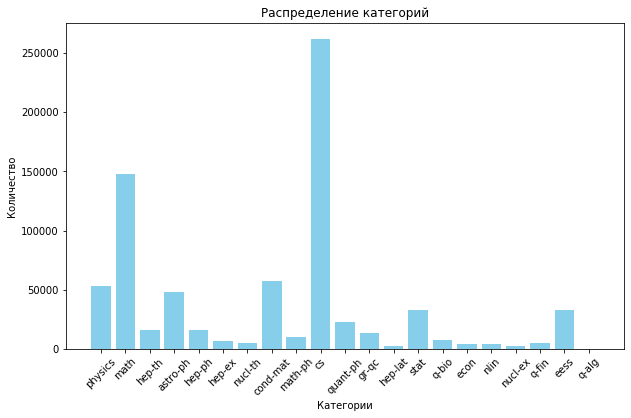

In [119]:
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
c = Counter(all_categories)
plt.xticks(rotation=45)
plt.title('Распределение категорий')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.bar(c.keys(), c.values(), color = "skyblue")
plt.show()

In [158]:
df.to_csv('arxiv.csv', index=False)  

In [3]:
df.head()

,id,title,categories
0,704.0033,Convergence of the discrete dipole approximati...,"['physics', 'optics']"
1,704.0038,The discrete dipole approximation: an overview...,"['physics', 'optics']"
2,704.0479,The affine part of the Picard scheme,"['math', 'AG']"
3,704.1476,TeV-scale gravity in Horava-Witten theory on a...,['hep-th']
4,705.1155,State Vector Determination By A Single Trackin...,['astro-ph']


In [10]:
all_titles = str()

for i in df.title:
    all_titles += i + ' '

In [25]:
import re

all_titles_clean = re.sub('[^A-Za-z0-9°]+', ' ', all_titles)
all_titles_clean = all_titles_clean.replace('\n', '').lower()

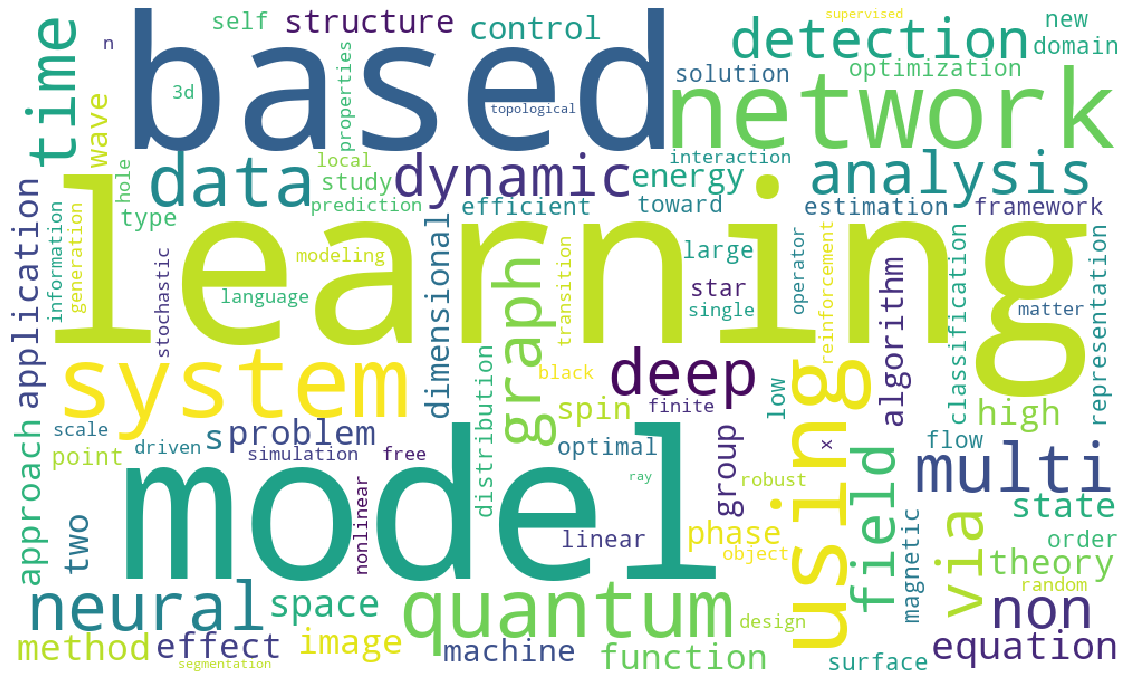

In [35]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width= 1000, height = 600, max_words=100,
                      random_state=1, background_color='white', colormap='viridis_r',
                      collocations=False, stopwords = STOPWORDS).generate(all_titles_clean)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()